# **DESAFIO KAGGLE I2A2 - SENTIMENT ANALYSIS**

# **1. Preparando o ambiente para interface com o GDrive**

In [1]:
from google.colab import files
from google.colab import auth
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


# **2. Importando as bibliotecas para EDA e DC**

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Configurar estilo seaborn para gráficos
sns.set_style('darkgrid')

In [38]:
# set seed for reproducibility
np.random.seed(0)

# **3. EDA - Exploratory Data Analysis & DC - Data Cleaning**

> ## **Arquivo train.csv**

> **3.1 Visualizando o dataset bruto**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/train.csv')
df.head(3)

<ipython-input-5-ff1f2aa34e63>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/train.csv')


,ID,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend,rating
0,1,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,1958.0,F,RJ,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,Estou contente com a compra entrega rápida o ú...,Yes,4
1,2,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,1996.0,M,SC,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
2,3,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,1984.0,M,SP,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4


In [ ]:
df.tail(3)

> **3.2 Informações sobre o dataset**

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

<Axes: >

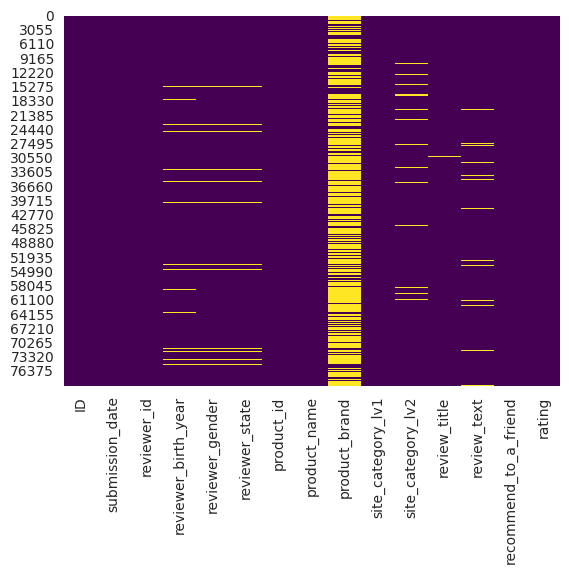

In [ ]:
# Visualizando missing values em gráfico
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
df.shape

(79425, 15)

In [ ]:
df.info

> **3.3 Verificando valores NaN**

In [ ]:
# Verificar se há valores NaN (not a number)
missing_count= df.isnull().sum() # Para contabilizar valores nulos
value_count=df.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # Para indicar o percentual de valores nulos
missing_df= pd.DataFrame({"Quantidade": missing_count, "Percentual": missing_percentage})
print(missing_df)

                       Quantidade  Percentual
ID                              0         0.0
submission_date                 0         0.0
reviewer_id                     0         0.0
reviewer_birth_year          3551         4.5
reviewer_gender              2484         3.1
reviewer_state               2402         3.0
product_id                      0         0.0
product_name                   52         0.1
product_brand               54779        69.0
site_category_lv1               4         0.0
site_category_lv2            2418         3.0
review_title                  177         0.2
review_text                  1967         2.5
recommend_to_a_friend          11         0.0
rating                          0         0.0


> **3.4 Retirando colunas que não servirão para o treinamento do modelo**

In [ ]:
df.drop(columns=['reviewer_birth_year','reviewer_gender' ,'submission_date','reviewer_id','reviewer_state','product_id','product_name','product_brand','site_category_lv1','site_category_lv2'], inplace=True)
df.head()

,ID,review_title,review_text,recommend_to_a_friend,rating
0,1,Bom,Estou contente com a compra entrega rápida o ú...,Yes,4
1,2,"Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
2,3,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4
3,4,Produto imperdível,"Excelente produto, por fora em material acríli...",Yes,5
4,5,ótimo,"produto mto bom, com essa garrafinha vc pode a...",Yes,5


>**3.5 Concatenando as colunas onde se tem textos que representam avaliações**

In [ ]:
# Concatene as duas colunas e coloque o resultado em uma nova coluna
df['Concatenada'] = df['review_title']+ ' . ' + df['review_text']
df.head(5)

,ID,review_title,review_text,recommend_to_a_friend,rating,Concatenada
0,1,Bom,Estou contente com a compra entrega rápida o ú...,Yes,4,Bom . Estou contente com a compra entrega rápi...
1,2,"Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4,"Preço imbatível, ótima qualidade . Por apenas ..."
2,3,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4,ATENDE TODAS AS EXPECTATIVA. . SUPERA EM AGILI...
3,4,Produto imperdível,"Excelente produto, por fora em material acríli...",Yes,5,"Produto imperdível . Excelente produto, por fo..."
4,5,ótimo,"produto mto bom, com essa garrafinha vc pode a...",Yes,5,"ótimo . produto mto bom, com essa garrafinha v..."


In [ ]:
# Retirando as colunas de texto que foram concatenadas
df.drop(columns=['review_title','review_text'], inplace=True)
# Salve o DataFrame atualizado em um novo arquivo CSV
df.to_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/train_conc_1.csv', index=False)  # O parâmetro index=False evita a inclusão do índice no arquivo CSV

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/train_conc_1.csv')
df1.head(5)

,ID,recommend_to_a_friend,rating,Concatenada
0,1,Yes,4,Bom . Estou contente com a compra entrega rápi...
1,2,Yes,4,"Preço imbatível, ótima qualidade . Por apenas ..."
2,3,Yes,4,ATENDE TODAS AS EXPECTATIVA. . SUPERA EM AGILI...
3,4,Yes,5,"Produto imperdível . Excelente produto, por fo..."
4,5,Yes,5,"ótimo . produto mto bom, com essa garrafinha v..."


> 3.6 Realizado tradução para o inglês e retirado inconsistências aparentes através do GoogleSheets

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/train_conc_modif_55k.csv')
df2.head(5)

,ID,recommend_to_a_friend,rating,Concatenada,Translated
0,1,Yes,4,Bom . Estou contente com a compra entrega rápi...,Good . I am happy with the purchase fast deliv...
1,2,Yes,4,"Preço imbatível, ótima qualidade . Por apenas ...","Unbeatable price, great quality. For only $ 19..."
2,3,Yes,4,ATENDE TODAS AS EXPECTATIVA. . SUPERA EM AGILI...,Meets all expectations. . Overcomes in agility...
3,4,Yes,5,"Produto imperdível . Excelente produto, por fo...","Must -see product. Excellent product, outside ..."
4,5,Yes,5,"ótimo . produto mto bom, com essa garrafinha v...","excellent . Very good product, with this bottl..."


In [ ]:
df2.drop(columns=['Concatenada'], inplace=True)
df2.head()

,ID,recommend_to_a_friend,rating,Translated
0,1,Yes,4,Good . I am happy with the purchase fast deliv...
1,2,Yes,4,"Unbeatable price, great quality. For only $ 19..."
2,3,Yes,4,Meets all expectations. . Overcomes in agility...
3,4,Yes,5,"Must -see product. Excellent product, outside ..."
4,5,Yes,5,"excellent . Very good product, with this bottl..."


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load your test dataset with "Text" and "Rating" columns
train_df = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/train_conc_modif_55k.csv', encoding='utf-8')
#train_df = train_df.dropna(subset=['Translated','rating'])
# Define a function to perform sentiment analysis and map sentiment to ratings

# Apply sentiment analysis and rating quantification to the "Text" column
# test_df['Quantified_Rating'] = test_df['Translated'].apply(quantify_sentiment)
train_df['Polarity'] = train_df['Translated'].apply(lambda text: TextBlob(text).sentiment.polarity)
train_df['Subjectivity'] = train_df['Translated'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

# Save
#train_df.to_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/train_sa.csv')

<ipython-input-19-6deeed6c3b6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

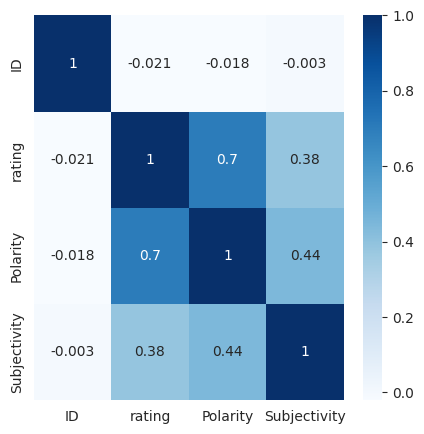

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(train_df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
train_df.drop(columns=['recommend_to_a_friend'], inplace=True)
train_df

,ID,rating,Concatenada,Translated,Polarity,Subjectivity
0,1,4,Bom . Estou contente com a compra entrega rápi...,Good . I am happy with the purchase fast deliv...,0.425000,0.800000
1,2,4,"Preço imbatível, ótima qualidade . Por apenas ...","Unbeatable price, great quality. For only $ 19...",0.550000,0.916667
2,3,4,ATENDE TODAS AS EXPECTATIVA. . SUPERA EM AGILI...,Meets all expectations. . Overcomes in agility...,0.004167,0.245833
3,4,5,"Produto imperdível . Excelente produto, por fo...","Must -see product. Excellent product, outside ...",0.458333,0.579167
4,5,5,"ótimo . produto mto bom, com essa garrafinha v...","excellent . Very good product, with this bottl...",0.955000,0.890000
...,...,...,...,...,...,...
53513,54996,1,EU COMPREI E ATÉ AGORA NÃO RECEBI O PRODUTO . ...,I bought it and so far I have not received the...,0.033333,0.433333
53514,54997,5,Superou as expectativas . Produto leve e poten...,Exceeded expectations. Light and powerful prod...,0.350000,0.850000
53515,54998,5,Oxímetro muito bom . O produto atendeu plename...,Oximeter very good. The product fully met expe...,0.671667,0.806667
53516,54999,4,"nota 9 . gostei muito do produto,entregue na d...","Note 9. I really liked the product, delivered ...",0.600000,0.800000


In [ ]:
# Crie a nova coluna com base na multiplicação das duas colunas
train_df['PxS'] = train_df['Polarity'] * train_df['Subjectivity']

# Aplique a condição: se a coluna 'Rating' for maior ou igual a 4, multiplique o resultado por -1
# train_df.loc[(train_df['rating'] >= 4) & (train_df['Polarity'] < 0), 'PxS'] *= -1
train_df

<ipython-input-52-6deeed6c3b6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

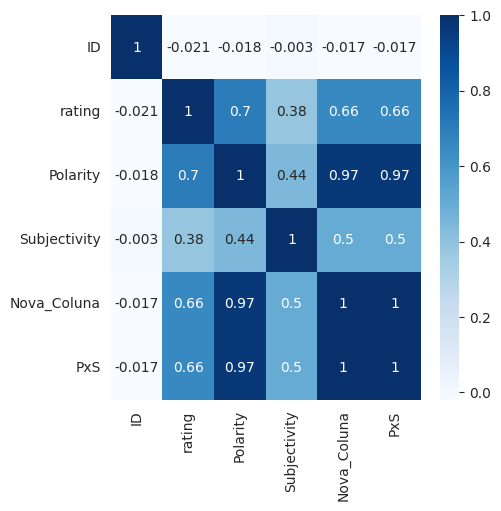

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(train_df.corr(),cbar=True,annot=True,cmap='Blues')

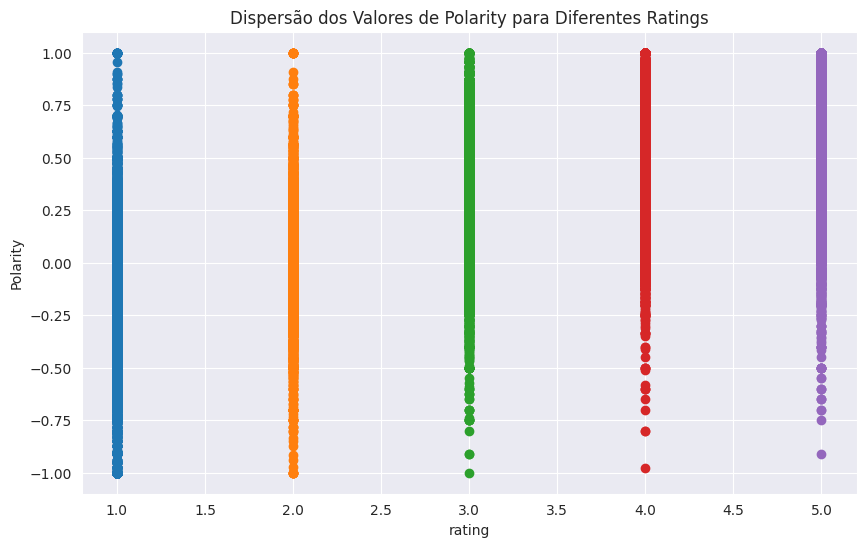

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupe o DataFrame por 'Rating'
grouped = train_df.groupby('rating')
# Defina o tamanho da figura
plt.figure(figsize=(10, 6))  # Ajuste os valores (largura, altura) conforme necessário

# Crie um gráfico de dispersão para cada valor em 'Rating'
for rating, group in grouped:
    plt.scatter(group['rating'], group['Polarity'], label=f'rating {rating}', marker='o')

# Definir rótulos dos eixos
plt.xlabel('rating')
plt.ylabel('Polarity')

# Definir título do gráfico
plt.title('Dispersão dos Valores de Polarity para Diferentes Ratings')

# Mostrar a legenda acima do gráfico
#plt.legend(loc='upper center')


# Mostrar o gráfico
plt.show()


> ## **Arquivo test.csv**

> **3.7 Visualizando o dataset bruto**

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/test.csv')
df3.head(3)

,ID,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend
0,79426,2018-04-14 13:37:06,1e996f21a57bed83512bfb593648a8e84b7cc373e71262...,1982.0,M,SP,132444092,Smartphone Motorola Moto G 5S Dual Chip Androi...,NaN,Celulares e Smartphones,Smartphone,Excelente,"Celular muito bom, a imagem dele em jogos impr...",Yes
1,79427,2018-01-21 17:38:59,808841afbd6011d7f8edb3a938ea4b8ad4b996e92efa6e...,1978.0,M,PR,132267647,Notebook Acer F5-573G-75A3 Intel Core 7 I7 8GB...,acer,Informática,Notebook,Excelente custo x benefício,Excelente produto! Vale a pena o investimento!...,Yes
2,79428,2018-02-01 11:28:11,228ed5791cebda164ae1da88a519394572ff0a19c0faf5...,1989.0,F,MG,112941526,Máquina de Cortar Cabelo + Aparador Wahl Clipp...,wahl,Beleza e Perfumaria,Barbearia,Produto exelente,"Fiquei muito satisfeita com minha compra, cheg...",Yes


In [ ]:
df3.shape

(52948, 14)

In [ ]:
# Verificar se há valores NaN (not a number)
# missing_count= df3.isnull().sum() # Para contabilizar valores nulos
# value_count=df.isnull().count()
# missing_percentage=round(missing_count/value_count *100, 1) # Para indicar o percentual de valores nulos
# missing_df= pd.DataFrame({"Quantidade": missing_count, "Percentual": missing_percentage})
# print(missing_df)

> **3.8 Retirando as colunas desnecessárias**

In [ ]:
df3.drop(columns=['reviewer_birth_year','reviewer_gender' ,'submission_date','reviewer_id','reviewer_state','product_id','product_name','product_brand','site_category_lv1','site_category_lv2'], inplace=True)
df3.head(3)

,ID,review_title,review_text,recommend_to_a_friend
0,79426,Excelente,"Celular muito bom, a imagem dele em jogos impr...",Yes
1,79427,Excelente custo x benefício,Excelente produto! Vale a pena o investimento!...,Yes
2,79428,Produto exelente,"Fiquei muito satisfeita com minha compra, cheg...",Yes


In [40]:
# Concatene as duas colunas e coloque o resultado em uma nova coluna
# df3['Concatenada'] = df3['review_title']+ ' . ' + df3['review_text']
# df3.drop(columns=['review_title','review_text' ], inplace=True)

# Salve o DataFrame atualizado em um novo arquivo CSV
df4 = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/test_translated_ok.csv')  # O parâmetro index=False evita a inclusão do índice no arquivo CSV

df4


,ID,recommend_to_a_friend,Concatenada,Translated
0,79426,Yes,"Excelente. Celular muito bom, a imagem dele em...","Great . Very good cell phone, his image in gam..."
1,79427,Yes,Excelente custo x benefício. Excelente produto...,Excellent cost x benefit. Excellent product! I...
2,79428,Yes,Produto exelente. Fiquei muito satisfeita com ...,Excellent product. I was very pleased with my ...
3,79429,Yes,Gostei muito do produto. Sem comentarios.........,I really liked the product. No comments..........
4,79430,Yes,"Ótimo produto, entrega rápida e excelente!!!. ...","Great product, fast and excellent delivery !!!..."
...,...,...,...,...
52943,132369,Yes,Nota 1000 !,"NOTE 1000! . New DVD, perfect operation. You s..."
52944,132370,Yes,top,TOP. to adoradno he hard 1 day and a half and ...
52945,132371,Yes,Ótimo produto!,Great product! . Product comes subtitled in Po...
52946,132372,Yes,Bom e bonito,Good and beautiful. I like heavy iron. So I th...


In [ ]:
df4.shape

(52948, 4)

In [51]:
import pandas as pd
from textblob import TextBlob

# Load your test dataset with "Text" and "Rating" columns
test_df = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/test_translated_ok.csv', encoding='utf-8')
test_df['Translated'].fillna('n', inplace=True)

#test_df = test_df.fillna('n')
test_df['Polarity'] = test_df['Translated'].apply(lambda text: TextBlob(text).sentiment.polarity)
test_df['Subjectivity'] = test_df['Translated'].apply(lambda text: TextBlob(text).sentiment.subjectivity)


# Save
test_df.to_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/test_sa.csv')

In [52]:
from pandas.io.formats.style_render import Subset
test_sa = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/test_sa.csv', encoding='utf-8')
# test_sa = test_sa.drop('Concatenada',axis=1)
test_sa.head(5)

,Unnamed: 0,ID,recommend_to_a_friend,Concatenada,Translated,Polarity,Subjectivity
0,0,79426,Yes,"Excelente. Celular muito bom, a imagem dele em...","Great . Very good cell phone, his image in gam...",0.562778,0.743889
1,1,79427,Yes,Excelente custo x benefício. Excelente produto...,Excellent cost x benefit. Excellent product! I...,0.512500,0.583333
2,2,79428,Yes,Produto exelente. Fiquei muito satisfeita com ...,Excellent product. I was very pleased with my ...,0.665000,0.895000
3,3,79429,Yes,Gostei muito do produto. Sem comentarios.........,I really liked the product. No comments..........,0.600000,0.800000
4,4,79430,Yes,"Ótimo produto, entrega rápida e excelente!!!. ...","Great product, fast and excellent delivery !!!...",0.543750,0.675000


In [21]:
test_df.shape


(52948, 6)

In [ ]:
!pip install tensorflow

In [ ]:
# TREINAMENTO DO MODELO PELO ARQUIVO ORIUNDO DO TRAIN.CSV

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
# data = pd.read_csv('/content/comparison.csv')


# Select features (Polarity and Subjectivity) and target (Rating)
X = train_df[['Polarity','Subjectivity']].values
#X = data[['Subjectivity']].values
y = train_df['rating'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model for regression
model = keras.Sequential([
    keras.layers.Input(shape=(2)), # Two input features (Polarity and Subjectivity)
    #keras.layers.Input(shape=(1)),  # one input features (Subjectivity)
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model
model.save('/content/sentiment_regression_model')

# Later, you can load the saved model for other applications
# loaded_model = keras.models.load_model('/content/sentiment_regression_model')


Epoch 1/50
1338/1338 [==============================] - 12s 7ms/step - loss: 1.1444 - val_loss: 1.0186
Epoch 2/50
1338/1338 [==============================] - 10s 7ms/step - loss: 0.9876 - val_loss: 0.9419
Epoch 3/50
1338/1338 [==============================] - 11s 8ms/step - loss: 0.9830 - val_loss: 0.9389
Epoch 4/50
1338/1338 [==============================] - 13s 10ms/step - loss: 0.9785 - val_loss: 0.9488
Epoch 5/50
1338/1338 [==============================] - 10s 7ms/step - loss: 0.9754 - val_loss: 0.9363
Epoch 6/50
1338/1338 [==============================] - 10s 7ms/step - loss: 0.9726 - val_loss: 0.9283
Epoch 7/50
1338/1338 [==============================] - 10s 8ms/step - loss: 0.9690 - val_loss: 0.9293
Epoch 8/50
1338/1338 [==============================] - 10s 7ms/step - loss: 0.9672 - val_loss: 0.9254
Epoch 9/50
1338/1338 [==============================] - 9s 7ms/step - loss: 0.9683 - val_loss: 0.9281
Epoch 10/50
1338/1338 [==============================] - 10s 8ms/step - l

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model on the test data
y_pred_a = model.predict(X_test)

y_pred = np.around(y_pred_a , 0)


# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


335/335 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 1.03
R-squared (R²) Score: 0.54


22/10 22:36 X=PxS

335/335 [==============================] - 1s 2ms/step

Mean Absolute Error (MAE): 0.71

Mean Squared Error (MSE): 1.02

R-squared (R²) Score: 0.55

64 e 32 sigmoid, 30 epocs, batch 32

Mean Absolute Error (MAE): 0.80

Mean Squared Error (MSE): 1.02

R-squared (R²) Score: 0.56


344/344 [==============================] - 1s 2ms/step

Mean Absolute Error (MAE): 0.78

Mean Squared Error (MSE): 0.98

R-squared (R²) Score: 0.58

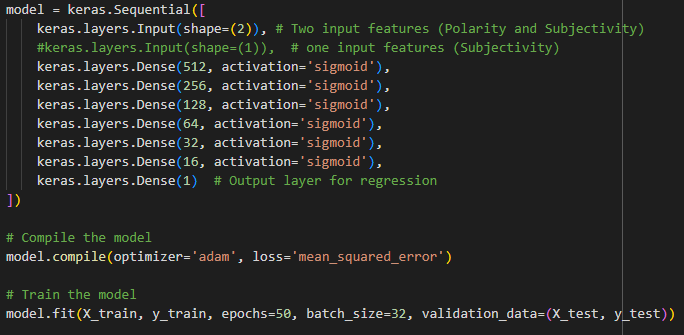

344/344 [==============================] - 1s 2ms/step

Mean Absolute Error (MAE): 0.77

Mean Squared Error (MSE): 0.98

R-squared (R²) Score: 0.58


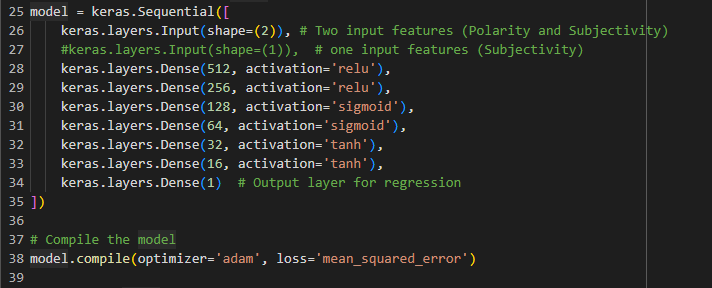

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/test_conc_1.csv')
df.head(5)

,ID,recommend_to_a_friend,Concatenada
0,79426,Yes,"Excelente . Celular muito bom, a imagem dele e..."
1,79427,Yes,Excelente custo x benefício . Excelente produt...
2,79428,Yes,Produto exelente . Fiquei muito satisfeita com...
3,79429,Yes,Gostei muito do produto . Sem comentarios........
4,79430,Yes,"Ótimo produto, entrega rápida e excelente!!! ...."


In [ ]:

testimonial = TextBlob('****. Excellent product..I recommend. Delivered before the deadline')
testimonial.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [ ]:
testimonial = TextBlob('Excellent product..I recommend. Delivered before the deadline')
testimonial.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [ ]:
import numpy as np

# modelo inicial drive # loaded_model = keras.models.load_model('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/sentiment_regression_model')
loaded_model = keras.models.load_model('/content/sentiment_regression_model')

# Assuming you have input data in the same format as X_test (Polarity and Subjectivity)
input_data = np.array([[0.62, 0.34]])  # Replace with your actual data

# Normalize/standardize the input data using the same scaler you used for training
input_data = scaler.transform(input_data)

# Make predictions using the loaded model
predicted_rating = loaded_model.predict(input_data)

# Print the predicted rating
print("Predicted Rating:", predicted_rating[0, 0])  # Assuming a single prediction


In [ ]:
!cp -r /content/sentiment_regression_model /content/drive/MyDrive/Veery

In [ ]:
# Assumindo que você já tem o array predicted_rating
import numpy as np

# Arredonde todos os elementos do array para um número específico de casas decimais (2 no exemplo)
rounded_predicted_rating = np.around(predicted_rating, 0)

# Print os valores arredondados
print("Rounded Predicted Ratings:", rounded_predicted_rating)


In [ ]:
x = round(5.76543)
print(x)


6


In [53]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Carregue seu arquivo CSV de teste
df_test = pd.read_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/test_sa.csv', encoding='utf-8')

# Extraia as características (Polarity e Subjectivity)
X = df_test[['Polarity', 'Subjectivity']].values

# Carregue o modelo treinado
loaded_model = keras.models.load_model('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/sentiment_regression_model')

# Normalize/standardize os dados de entrada usando o mesmo scaler que você usou para treinamento
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Faça previsões usando o modelo carregado
predictions = loaded_model.predict(X)

# Transforme as previsões em um array unidimensional
predictions = predictions.ravel()

# Crie um novo DataFrame com as previsões
df_predictions = pd.DataFrame({'Rating': predictions})

# Concatene o DataFrame de previsões com o DataFrame de teste original
df_test = pd.concat([df_test, df_predictions], axis=1)

# Salve o DataFrame atualizado em um novo arquivo CSV
df_test.to_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/output_data.csv', index=False, encoding='utf-8')


1655/1655 [==============================] - 4s 2ms/step


In [54]:
df_test.head()

,Unnamed: 0,ID,recommend_to_a_friend,Concatenada,Translated,Polarity,Subjectivity,Rating
0,0,79426,Yes,"Excelente. Celular muito bom, a imagem dele em...","Great . Very good cell phone, his image in gam...",0.562778,0.743889,4.604375
1,1,79427,Yes,Excelente custo x benefício. Excelente produto...,Excellent cost x benefit. Excellent product! I...,0.512500,0.583333,4.335031
2,2,79428,Yes,Produto exelente. Fiquei muito satisfeita com ...,Excellent product. I was very pleased with my ...,0.665000,0.895000,4.628495
3,3,79429,Yes,Gostei muito do produto. Sem comentarios.........,I really liked the product. No comments..........,0.600000,0.800000,4.475408
4,4,79430,Yes,"Ótimo produto, entrega rápida e excelente!!!. ...","Great product, fast and excellent delivery !!!...",0.543750,0.675000,4.469010


In [8]:
df_test.shape

(52948, 8)

In [56]:

df_test.drop(columns=['recommend_to_a_friend','Concatenada','Translated','Polarity','Subjectivity'], inplace=True)
df_test.head(3)

,Unnamed: 0,ID,Rating
0,0,79426,4.604375
1,1,79427,4.335031
2,2,79428,4.628495


In [57]:
# Assumindo que você já tem o array predicted_rating
import numpy as np

# Arredonde todos os elementos do array para um número específico de casas decimais (2 no exemplo)
df_test['Rating'] = df_test['Rating'].round().astype(int)
df_test = df_test.loc[:, ~df_test.columns.str.contains('^Unnamed')]

df_test.head()

,ID,Rating
0,79426,5
1,79427,4
2,79428,5
3,79429,4
4,79430,4


In [58]:
# Verificar se há valores NaN (not a number)
missing_count= df_test.isnull().sum() # Para contabilizar valores nulos
value_count=df_test.isnull().count()
missing_percentage=round(missing_count/value_count *100, 1) # Para indicar o percentual de valores nulos
missing_df= pd.DataFrame({"Quantidade": missing_count, "Percentual": missing_percentage})
print(missing_df)

        Quantidade  Percentual
ID               0         0.0
Rating           0         0.0


In [59]:
df_test.to_csv('/content/drive/MyDrive/Data Science/I2A2/Redes Generativas/Sentiment Analysis/output_submission.csv',index=False)